In [81]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
warnings.filterwarnings("ignore")

### Reading the Data

In [82]:
df=pd.read_csv(r"C:\Users\vaish\Downloads\ML Advanced Exam Paper\Dataset\RFM Dataset\RFM data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [83]:
df.shape

(392735, 9)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392735 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392735 non-null  int64  
 1   StockCode    392735 non-null  object 
 2   Description  392735 non-null  object 
 3   Quantity     392735 non-null  int64  
 4   InvoiceDate  392735 non-null  object 
 5   UnitPrice    392735 non-null  float64
 6   CustomerID   392735 non-null  float64
 7   Country      392735 non-null  object 
 8   TotalPrice   392735 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.0+ MB


In [85]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

No missing values in the data

In [86]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'].astype(str)) # Converting Datatype of Variable invoice date

In [87]:
df['Description'].nunique()  #How many unique items in the dataset?

3837

In [88]:
df["Description"].value_counts()[:10] #How many product in the dataset?

Description
white hanging heart t-light holder    2003
regency cakestand 3 tier              1708
jumbo bag red retrospot               1562
party bunting                         1384
assorted colour bird ornament         1355
lunch bag red retrospot               1312
set of 3 cake tins pantry design      1155
lunch bag  black skull.               1104
pack of 72 retrospot cake cases       1047
paper chain kit 50's christmas        1011
Name: count, dtype: int64

In [89]:
#Ranking the 5 most ordered products from most to least
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).head(5)

,Quantity
Description,
jumbo bag red retrospot,30251
white hanging heart t-light holder,24953
world war 2 gliders asstd designs,23263
pack of 72 retrospot cake cases,22893
assorted colour bird ornament,22154


### Calculating Recency

In [90]:
df_recency = df.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()

df_recency.columns=['CustomerID','InvoiceDate']
recent_date=df_recency['InvoiceDate'].max()

df_recency['Recency']=df_recency['InvoiceDate'].apply(lambda x: (recent_date-x).days)

df_recency.head()

,CustomerID,InvoiceDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12350.0,2011-02-02 16:01:00,309
4,12352.0,2011-11-03 14:37:00,35


### Calculating Frequency

In [91]:
frequency_df=df.drop_duplicates().groupby(by=['CustomerID'],as_index=False)['InvoiceDate'].count()

frequency_df.columns=['CustomerID','Frequency']

frequency_df.head()

,CustomerID,Frequency
0,12347.0,181
1,12348.0,27
2,12349.0,71
3,12350.0,16
4,12352.0,77


### Calculating Monetary

In [92]:
monetary_df = df.groupby(by='CustomerID',as_index=False)['TotalPrice'].sum()
monetary_df.columns =['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12347.0,4060.40
1,12348.0,1437.24
2,12349.0,1417.60
3,12350.0,294.40
4,12352.0,1385.74


### Merging the dataframes of recency,frequency and monetary 

In [93]:
rf_df=df_recency.merge(frequency_df , on='CustomerID')
rfm_df= rf_df.merge(monetary_df,on='CustomerID').drop(columns='InvoiceDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,1,181,4060.40
1,12348.0,74,27,1437.24
2,12349.0,18,71,1417.60
3,12350.0,309,16,294.40
4,12352.0,35,77,1385.74


#### Normalizing the values to get RFM score

In [94]:
rfm_df['R_rank']=rfm_df['Recency'].rank(ascending= False )
rfm_df['F_rank']=rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank']=rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12347.0,1,181,4060.40,97.919116,88.238716,92.554677
1,12348.0,74,27,1437.24,38.443452,37.296417,72.824570
2,12349.0,18,71,1417.60,74.194686,66.449511,72.312704
3,12350.0,309,16,294.40,5.325652,23.394602,24.941833
4,12352.0,35,77,1385.74,58.640959,68.252676,71.731038


In [95]:
rfm_df['RFM_Score'] =0.20*rfm_df['R_rank_norm']+0.20* \
 rfm_df['F_rank_norm']+0.60*rfm_df['M_rank_norm']

rfm_df['RFM_Score']*= 0.05
rfm_df['RFM_Score'].sort_values(ascending=False)
rfm_df=rfm_df.round(2)

rfm_df[['CustomerID','RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12347.0,4.64
1,12348.0,2.94
2,12349.0,3.58
3,12350.0,1.04
4,12352.0,3.42
5,12353.0,0.31
6,12354.0,2.71


In [96]:
rfm_df['RFM_Score'].describe()

count    4298.000000
mean        2.505898
std         1.288410
min         0.040000
25%         1.410000
50%         2.490000
75%         3.580000
max         5.000000
Name: RFM_Score, dtype: float64

Inferences: There are 4,298 customers in the dataset.
The average RFM score is approximately 2.51.
The lowest RFM score is 0.04.
The median RFM score is 2.49, which means that half of the customers have an RFM score below this value and the other half have a score above this value.

#### Scaling the values for recency,frequency and monetary scores so that they come in range from 1 to 5

In [97]:
#Date from customer's last purchase.The nearest date gets 5 and the furthest date gets 1.
rfm_df["R"] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 5.
rfm_df["F"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#Total spend by the customer.The least money gets 1, the most money gets 5.
rfm_df["M"]= pd.qcut(rfm_df["Monetary"],5,labels=[1,2,3,4,5])
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,R,F,M
0,12347.0,1,181,4060.40,97.92,88.24,92.55,4.64,5,5,5
1,12348.0,74,27,1437.24,38.44,37.30,72.82,2.94,2,2,4
2,12349.0,18,71,1417.60,74.19,66.45,72.31,3.58,4,4,4
3,12350.0,309,16,294.40,5.33,23.39,24.94,1.04,1,2,2
4,12352.0,35,77,1385.74,58.64,68.25,71.73,3.42,3,4,4


### Calculating RFM Score

In [98]:
rfm_df["RFM_SCORE"] = (rfm_df["R"].astype(str) + rfm_df["F"].astype(str) +  rfm_df["M"].astype(str))

#### Segments with RFM score range: 
 - Champions: RFM score range - R: 4-5, F: 4-5, M: 4-5 
 - Loyal customers: RFM score range - R: 3-5, F: 3-5, M: 3-5 
 - Potential loyalist: RFM score range - R: 4-5, F: 2-3, M: 2-3 
 - Recent customers: RFM score range - R: 4-5, F: 1-2, M: 1-2
- Promising: RFM score range - R: 4-5, F: 1-2, M: 1-2 
 - Needs attention: RFM score range - R: 3-5, F: 3-5, M: 3-5 
 - About to sleep: RFM score range - R: 1-2, F: 1-2, M: 1-2 
 - At risk: RFM score range - R: 2-5, F: 1-3, M: 1-3
 - Can't lose them: RFM score range - R: 1-3, F: 4-5, M: 4-5
 - Hibernating: RFM score range - R: 1-2, F: 1-2, M: 1-2

### Segmenting the customers based on above conditions

In [99]:
def segment_customer(df):
    if df['R'] >= 4 and df['F'] >= 4 and df['M'] >= 4:
        return 'Champion'
    elif 3 <= df['R'] <= 5 and 3 <= df['F'] <= 5 and 3 <= df['M'] <= 5:
        return 'Loyal Customer'
    elif df['R'] >= 4 and 2 <= df['F'] <= 3 and 2 <= df['M'] <= 3:
        return 'Potential Loyalist'
    elif df['R'] >= 4 and 1 <= df['F'] <= 2 and 1 <= df['M'] <= 2:
        return 'Promising'
    elif 3 <= df['R'] <= 5 and 3 <= df['F'] <= 5 and 3 <= df['M'] <= 5:
        return 'Needs Attention'
    elif 1 <= df['R'] <= 2 and 1 <= df['F'] <= 2 and 1 <= df['M'] <= 2:
        return 'About to Sleep'
    elif df['R'] >= 2 and df['R'] <= 5 and 1 <= df['F'] <= 3 and 1 <= df['M'] <= 3:
        return 'At Risk'
    elif 1 <= df['R'] <= 3 and df['F'] >= 4 and df['M'] >= 4:
        return 'Can\'t Lose Them'
    elif df['R'] >= 4 and 1 <= df['F'] <= 2 and 1 <= df['M'] <= 2:
        return 'Recent Customer'
    else:
        return 'Hibernating'

rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

rfm_df


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,R,F,M,RFM_SCORE,Segment
0,12347.0,1,181,4060.40,97.92,88.24,92.55,4.64,5,5,5,555,Champion
1,12348.0,74,27,1437.24,38.44,37.30,72.82,2.94,2,2,4,224,Hibernating
2,12349.0,18,71,1417.60,74.19,66.45,72.31,3.58,4,4,4,444,Champion
3,12350.0,309,16,294.40,5.33,23.39,24.94,1.04,1,2,2,122,About to Sleep
4,12352.0,35,77,1385.74,58.64,68.25,71.73,3.42,3,4,4,344,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4293,18280.0,277,10,180.60,8.28,14.10,14.10,0.65,1,1,1,111,About to Sleep
4294,18281.0,180,7,80.82,20.07,9.04,2.89,0.38,1,1,1,111,About to Sleep
4295,18282.0,7,12,178.05,88.46,17.45,13.68,1.47,5,1,1,511,Promising
4296,18283.0,3,719,2088.93,93.59,99.27,81.62,4.38,5,5,5,555,Champion


In [100]:
rfm_df.Segment.value_counts()

Segment
Champion              930
About to Sleep        877
Loyal Customer        787
At Risk               601
Hibernating           544
Can't Lose Them       199
Potential Loyalist    192
Promising             168
Name: count, dtype: int64

### Visualizing RFM Grid

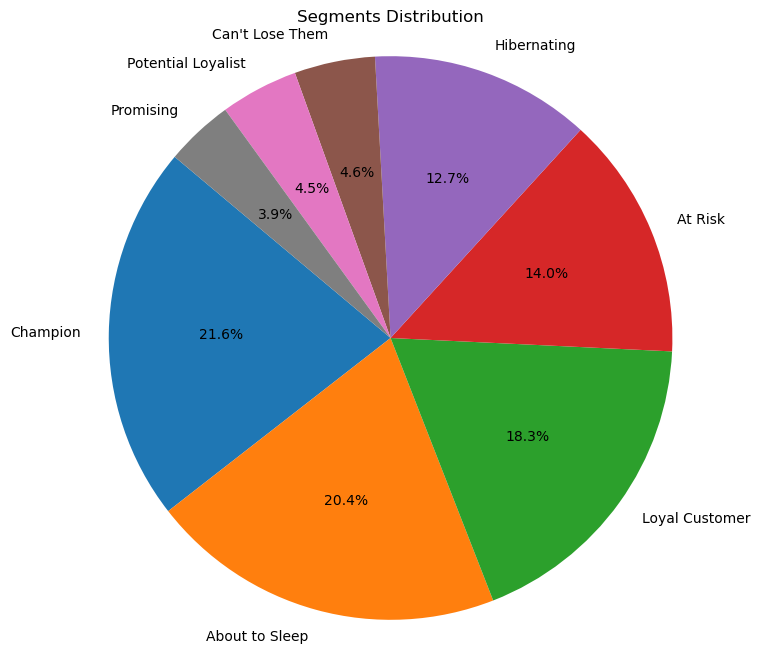

In [101]:
plt.figure(figsize=(8, 8))
plt.pie(rfm_df.Segment.value_counts(), labels=rfm_df.Segment.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Segments Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### RFM Analysis Insights

1. Champions (930)
Characteristics:

High Recency (recent purchases)
High Frequency (frequent purchases)
High Monetary value (high spending)
Business Implications:

These are your best customers. They are highly engaged and spend the most.
Focus on retaining them with personalized offers, loyalty programs, and exclusive deals.
Consider them for early access to new products or special events.
2. About to Sleep (877)
Characteristics:

Low Recency (haven't purchased recently)
Low Frequency (infrequent purchases)
Low Monetary value (low spending)
Business Implications:

These customers are on the verge of becoming inactive.
Re-engage them with targeted campaigns, such as win-back or reactivation offers.
Offer discounts or reminders of the benefits of your products/services.
3. Loyal Customers (787)
Characteristics:

High Recency
High Frequency
Moderate to High Monetary value
Business Implications:

These customers are loyal and regularly engage with your brand.
Strengthen the relationship with personalized communication and loyalty rewards.
Gather feedback to improve their experience and further increase their lifetime value.
4. At Risk (601)
Characteristics:

Moderate Recency (haven't purchased in a while)
Low to Moderate Frequency
Low to Moderate Monetary value
Business Implications:

These customers are in danger of becoming inactive.
Implement retention strategies, such as personalized offers or reminders.
Identify reasons for their reduced engagement and address potential issues.
5. Hibernating (544)
Characteristics:

Low Recency
Low Frequency
Moderate to High Monetary value in the past
Business Implications:

These customers were valuable but have become inactive.
Use reactivation campaigns to remind them of your brand.
Offer special incentives to encourage a return purchase.
6. Can't Lose Them (199)
Characteristics:

Low Recency
High Frequency
High Monetary value
Business Implications:

These are high-value customers who haven't purchased recently.
Prioritize re-engagement efforts with personalized outreach and exclusive offers.
Understand the reasons for their inactivity to prevent further disengagement.
7. Potential Loyalists (192)
Characteristics:

High Recency
Moderate Frequency
Moderate Monetary value
Business Implications:

These customers have the potential to become loyal.
Nurture them with targeted marketing, highlighting loyalty benefits and rewards.
Encourage more frequent purchases through loyalty programs or personalized recommendations.
8. Promising (168)
Characteristics:

High Recency
Low Frequency
Low Monetary value
Business Implications:

These are new customers with recent engagement but low spending and frequency.
Cultivate their interest with onboarding campaigns and introductory offers.
Focus on converting them into repeat buyers with tailored incentives.
#### Summary and Strategies
Retention and Loyalty: Focus on Champions, Loyal Customers, and Can't Lose Them. Implement loyalty programs, personalized offers, and exclusive benefits to retain these high-value segments.
Reactivation: Develop targeted reactivation campaigns for About to Sleep, Hibernating, and At Risk customers. Identify the reasons for their inactivity and address those issues with personalized offers and communication.
Nurturing: Engage Potential Loyalists and Promising customers by providing them with tailored content and incentives to increase their frequency and spending. Highlight the benefits of becoming loyal customers and create pathways for them to move up the loyalty ladder.
Overall Strategy: Use data-driven insights to customize marketing efforts for each segment. Leverage CRM tools to automate and personalize communication, ensuring that each customer segment receives the right message at the right time.
